## SRI Model

$$
\begin{cases}
\frac{ds}{dt} = f(s(t), i(t)) = -\beta is \\
\frac{di}{dt} = g(s(t), i(t)) = \beta is - \gamma i
\end{cases}
$$


## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Euler

In [8]:
def euler_sir(s0,i0, parameters, time, dt, tolerance=1e-6, max_iterations=150, show_iter = False):
    beta = parameters['beta']
    gamma = parameters['gamma']

    n_steps = len(time)

    s = np.zeros_like(time)
    i = np.zeros_like(time)
    r = np.zeros_like(time)
    iter_count = np.zeros(n_steps, dtype=int)
    first_iteration = {"S_n1":[], "I_n1":[]}

    s[0] = s0
    i[0] = i0
    r[0] = 1.0 - s[0] - r[0]

    print(n_steps)
    for n in range(n_steps-1):
        current_s = s[n]
        current_i = i[n]

        i_prev = current_i
        s_prev = current_s

        converged = False
        for k in range(1, max_iterations+1):
            s_next = current_s - dt * beta * s_prev * i_prev
            i_next = current_i + dt * (beta * s_prev * i_prev - gamma * i_prev)

            if n==0:
                first_iteration['S_n1'].append(s_next)
                first_iteration['I_n1'].append(i_next)



            if (abs(s_next - s_prev) < tolerance) and (abs(i_next - i_prev) < tolerance):
                s[n+1] = s_next
                i[n+1] = i_next
                r[n+1] = 1.0 - s_next - i_next
                iter_count[n+1] = k
                converged = True
                break

            s_prev, i_prev = s_next, i_next


        if not converged:
            s[n+1] = s_next
            i[n+1] = i_next
            r[n+1] = 1.0 - s_next - i_next
            iter_count[n+1] = max_iterations

        if show_iter:
            print(f"Iters in {n}th step: {iter_count[n]}")

        if n==1:
            df_fr = pd.DataFrame(first_iteration)
            print(df_fr)

    return s, i, r, iter_count


### Calculation for $\Delta t = 10$


36
Iters in 0th step: 0
Iters in 1th step: 128
         S_n1      I_n1
0    0.594000  0.336000
1    0.221414  0.543386
2    0.490934  0.128696
3    0.685184  0.224729
4    0.376466  0.466224
..        ...       ...
123  0.414591  0.344358
124  0.414590  0.344359
125  0.414589  0.344360
126  0.414590  0.344358
127  0.414590  0.344359

[128 rows x 2 columns]
Iters in 2th step: 108
Iters in 3th step: 49
Iters in 4th step: 27
Iters in 5th step: 18
Iters in 6th step: 14
Iters in 7th step: 19
Iters in 8th step: 20
Iters in 9th step: 20
Iters in 10th step: 19
Iters in 11th step: 19
Iters in 12th step: 18
Iters in 13th step: 17
Iters in 14th step: 16
Iters in 15th step: 15
Iters in 16th step: 14
Iters in 17th step: 13
Iters in 18th step: 13
Iters in 19th step: 12
Iters in 20th step: 11
Iters in 21th step: 10
Iters in 22th step: 9
Iters in 23th step: 8
Iters in 24th step: 7
Iters in 25th step: 6
Iters in 26th step: 5
Iters in 27th step: 4
Iters in 28th step: 3
Iters in 29th step: 2
Iters in 30t

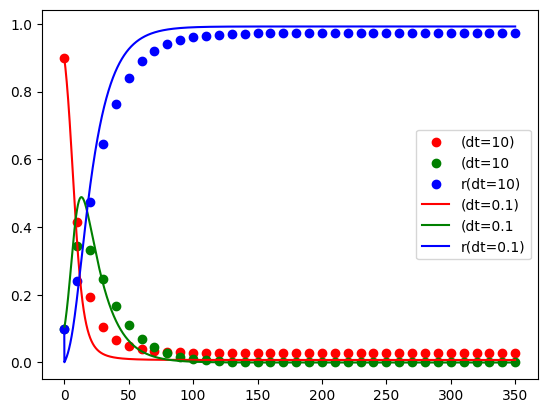

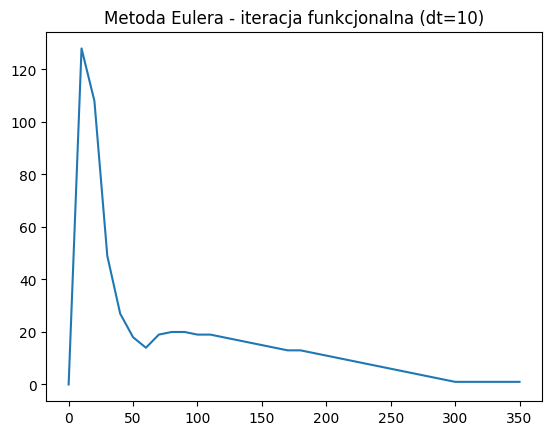

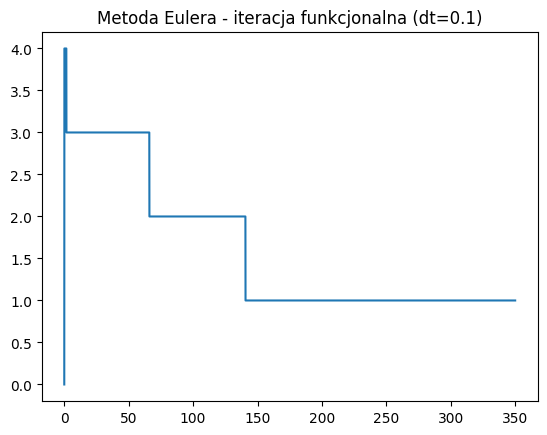

In [9]:
parameters = {
    'beta': 0.34,
    'gamma': 0.07,
}

show_iter = True
i0, s0 = 0.1, 0.9

dt = 10
time10 = np.arange(start=0.0, stop=350.1, step=dt)

ddt = 0.1
time01 = np.arange(start=0.0, stop=350.01, step=ddt)

s10,i10,r10,iter_count10 = euler_sir(s0, i0, parameters, time10, dt, show_iter = True)
s01, i01, r01, iter_count01 = euler_sir(s0,i0, parameters, time01, ddt)


plt.scatter(time10, s10, label="(dt=10)", color="red")
plt.scatter(time10, i10, label="(dt=10", color="green")
plt.scatter(time10, r10, label="r(dt=10)", color="blue")

plt.plot(time01, s01, label="(dt=0.1)", color="red")
plt.plot(time01, i01, label="(dt=0.1", color="green")
plt.plot(time01, r01, label="r(dt=0.1)", color="blue")

plt.legend();
plt.show()

plt.plot(time10, iter_count10)
plt.title("Metoda Eulera - iteracja funkcjonalna (dt=10)")
plt.show()

plt.plot(time01, iter_count01)
plt.title("Metoda Eulera - iteracja funkcjonalna (dt=0.1)")
plt.show()


## Metoda Trapezów


In [16]:
def trapezoid_method(s0,i0, parameters, time, dt, tolerance=1e-6, max_iterations=150, show_iter = False):
    beta = parameters['beta']
    gamma = parameters['gamma']

    n_steps = len(time)

    s = np.zeros_like(time)
    i = np.zeros_like(time)
    r = np.zeros_like(time)
    iter_count = np.zeros(n_steps, dtype=int)
    first_iteration = {"S_n1":[], "I_n1":[]}

    s[0] = s0
    i[0] = i0
    r[0] = 1.0 - s[0] - r[0]

    print(n_steps)
    for n in range(n_steps-1):
        current_s = s[n]
        current_i = i[n]

        i_mu = current_i
        s_mu = current_s

        converged = False
        for k in range(1, max_iterations+1):
            s_next = current_s - (dt/2) * (beta*current_s*current_i + beta*s_mu*i_mu)
            i_next = current_i + (dt/2) * (beta*current_s*current_i - gamma*current_i + beta*s_mu*i_mu - gamma*i_mu)

            if n==0:
                first_iteration['S_n1'].append(s_next)
                first_iteration['I_n1'].append(i_next)



            if (abs(s_next - s_mu) < tolerance) and (abs(i_next - i_mu) < tolerance):
                s[n+1] = s_next
                i[n+1] = i_next
                r[n+1] = 1.0 - s_next - i_next
                iter_count[n+1] = k
                converged = True
                break

            s_mu, i_mu = s_next, i_next


        if not converged:
            s[n+1] = s_next
            i[n+1] = i_next
            r[n+1] = 1.0 - s_next - i_next
            iter_count[n+1] = max_iterations

        if show_iter:
            print(f"Iters in {n}th step: {iter_count[n]}")

        if n==1:
            df_fr = pd.DataFrame(first_iteration)
            print(df_fr)

    return s, i, r, iter_count

36
Iters in 0th step: 0
Iters in 1th step: 18
        S_n1      I_n1
0   0.594000  0.336000
1   0.407707  0.439693
2   0.442248  0.368860
3   0.469683  0.366216
4   0.454591  0.382234
5   0.451608  0.379610
6   0.455561  0.376576
7   0.455360  0.377839
8   0.454511  0.378246
9   0.454742  0.377872
10  0.454882  0.377863
11  0.454799  0.377949
12  0.454786  0.377932
13  0.454807  0.377917
14  0.454805  0.377924
15  0.454801  0.377926
16  0.454802  0.377924
17  0.454803  0.377924
Iters in 2th step: 22
Iters in 3th step: 16
Iters in 4th step: 12
Iters in 5th step: 12
Iters in 6th step: 12
Iters in 7th step: 11
Iters in 8th step: 10
Iters in 9th step: 10
Iters in 10th step: 9
Iters in 11th step: 8
Iters in 12th step: 8
Iters in 13th step: 7
Iters in 14th step: 6
Iters in 15th step: 6
Iters in 16th step: 5
Iters in 17th step: 4
Iters in 18th step: 4
Iters in 19th step: 3
Iters in 20th step: 2
Iters in 21th step: 2
Iters in 22th step: 1
Iters in 23th step: 1
Iters in 24th step: 1
Iters in 25

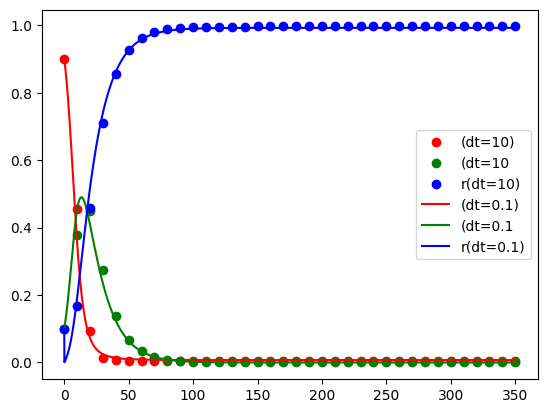

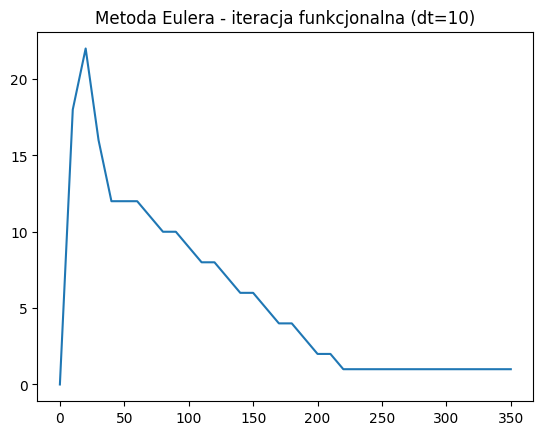

Text(0.5, 1.0, 'Metoda Eulera - iteracja funkcjonalna (dt=0.1)')

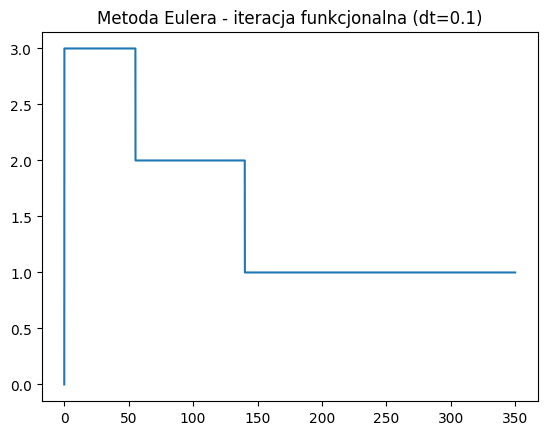

In [18]:
s10,i10,r10,iter_count10 = trapezoid_method(s0, i0, parameters, time10, dt, show_iter = True)
s01, i01, r01, iter_count01 = trapezoid_method(s0,i0, parameters, time01, ddt)


plt.scatter(time10, s10, label="(dt=10)", color="red")
plt.scatter(time10, i10, label="(dt=10", color="green")
plt.scatter(time10, r10, label="r(dt=10)", color="blue")

plt.plot(time01, s01, label="(dt=0.1)", color="red")
plt.plot(time01, i01, label="(dt=0.1", color="green")
plt.plot(time01, r01, label="r(dt=0.1)", color="blue")

plt.legend();
plt.show()

plt.plot(time10, iter_count10)
plt.title("Metoda Eulera - iteracja funkcjonalna (dt=10)")
plt.show()

plt.plot(time01, iter_count01)
plt.title("Metoda Eulera - iteracja funkcjonalna (dt=0.1)")